# Solved midpoints?
> Itsik claims to have solved the midpoint problem analytically. Does it work?

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$
\begin{align}
A &:= \theta_1,\\
B &:= \theta_2,\\
M &:= \theta_m,\\
C &:= \cos(A) \cos(B),\\
D &:= \cos(A) - \cos(B),\\
E &:= \sin(A)-\sin(B),\\
T &:= \tan(M).
\end{align}
$$

Starting with the initial equations, we reach:

$$
\begin{align}
\cos^2(M) C D - \sin^2(M) D (1 + C) - 2 \cos(M) \sin(M) C E &= 0, \\
C D - \tan^2(M) D (1 + C) - 2 \tan(M) C E &= 0, \\
1 - \tan^2(M) (1 + 1/C) - 2 \tan(M) E/D &= 0.   \hspace{10mm} &(0 < A,B < \pi/2)
\end{align}
$$

Substituting $T = \tan(M)$ in the above equation:

$$
\begin{align}
(1+1/C) T^2 + 2(E/D) T - 1 &= 0, \\
T &= \frac{- E/D \pm \sqrt{ (E/D)^2 + (1+1/C) }}{ (1+1/C)}.
\end{align}
$$

Next, evaluating $E/D$:

$$
\begin{align}
\frac{E}{D} &= \frac{(\cos(A)-\cos(B))/(\sin(A)-\sin(B))}{-2\sin((A+B)/2)\sin((A-B)/2) / 2\cos((A+B)/2)\sin((A-B)/2)} \\
&= -\tan((A+B)/2).
\end{align}
$$

Further simplification gives:

$$
\begin{align}
(E/D)^2 &= \frac{(1-\cos (A+B))/(1+\cos(A+B))}{-1+2/(1+\cos(A+B))}, \\
C &= \frac{(\cos (A+B) + \cos (A-B) )}{2}.
\end{align}
$$

Finally, plugging these expressions back into the quadratic equation for $T$:

$$
\begin{align}
T &= \frac{\tan((A+B)/2) \pm \sqrt{2}\sqrt{ 1/(1+\cos(A+B)) + 1/(\cos (A+B) + \cos (A-B) )  }}{ (1+1/C)}.
\end{align}
$$

The expression inside the square root might simplify further with some additional trigonometric identities or algebraic manipulations.

In [44]:
import numpy as np

# theta_1 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_1 = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)
# theta_2 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2 = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)


def is_midpoint(t1, t2, tm):
    return np.allclose(
        np.cos(t2) * np.cos(t1 + tm) ** 2,
        np.cos(t1) * np.cos(t2 + tm) ** 2,
        atol=1e-5,
    )


def get_midpoint(a, b):
    if np.isclose(a, b):
        return [a]

    c = np.cos(a) * np.cos(b)
    d = np.cos(a) - np.cos(b)
    e = np.sin(a) - np.sin(b)

    if np.isclose(c, 0):
        print("c is close to 0")

    t1 = -e / d
    t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))
    t3 = 1 + 1 / c

    if np.isnan(t1):
        print("t1 is nan")
    if np.isnan(t2):
        print("t2 is nan", 1 / c)
    if np.isnan(t3):
        print("t3 is nan")

    # t1 = np.tan((a + b) / 2)
    # t2 = np.sqrt(2) * np.sqrt(1 / (1 + np.cos(a + b)) + 1 / (np.cos(a + b) + np.cos(a - b)))
    # t3 = 1 + 1 / c

    T_solutions = [(t1 + t2) / t3, (t1 - t2) / t3]  # quadratic
    M_solutions = [np.arctan(t) for t in T_solutions]  # since T := tan(M)

    return M_solutions


for t1 in theta_1:
    for t2 in theta_2:
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)

In [46]:
# Verify for pi/2 to 3pi/4:

theta_1_b = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2_b = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)

for t1 in theta_1_b:
    for t2 in theta_2_b:
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)

/tmp/ipykernel_2843372/1513538373.py:29: RuntimeWarning: invalid value encountered in sqrt
  t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))


t2 is nan -178.67051834353407
No midpoint found for 0.7863981633974483 1.5787195405665881
t2 is nan -59.56182485222528
No midpoint found for 0.7863981633974483 1.5945659681099709
t2 is nan -35.74307844833767
No midpoint found for 0.7863981633974483 1.6104123956533538
t2 is nan -25.53718313146039
No midpoint found for 0.7863981633974483 1.6262588231967365
t2 is nan -19.868906598355633
No midpoint found for 0.7863981633974483 1.6421052507401193
t2 is nan -16.26318597394365
No midpoint found for 0.7863981633974483 1.657951678283502
t2 is nan -13.76807440631753
No midpoint found for 0.7863981633974483 1.673798105826885
t2 is nan -11.93933038602892
No midpoint found for 0.7863981633974483 1.6896445333702677
t2 is nan -10.541767546128847
No midpoint found for 0.7863981633974483 1.7054909609136506
t2 is nan -9.439225641357028
No midpoint found for 0.7863981633974483 1.7213373884570333
t2 is nan -8.547415253715567
No midpoint found for 0.7863981633974483 1.737183816000416
t2 is nan -7.81136526

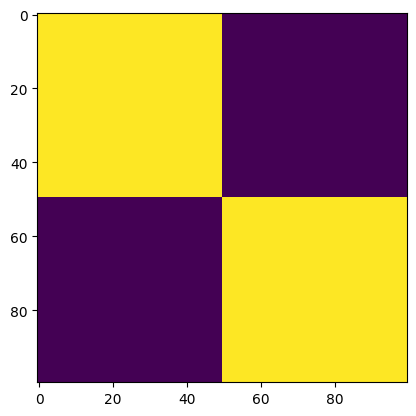

In [49]:
# Across the whole range:
import matplotlib.pyplot as plt

theta_1_c = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)

In [ ]:
# Specifically when theta_1 and theta_2 land in different quadrants:
import matplotlib.pyplot as plt

theta_1_c = np.linspace(np.pi / 4 + 0.001, *np.pi / 2 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)

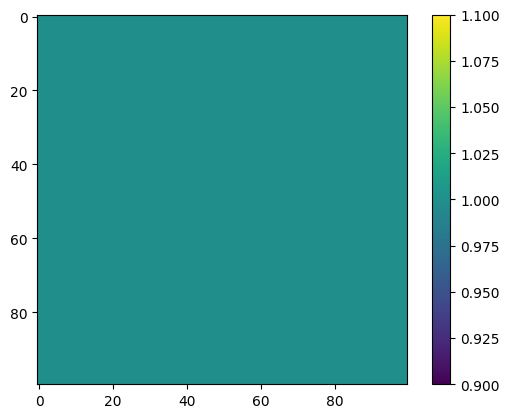

In [62]:
# Oh okay, I think this works!!!!!


def get_midpoint_cot(a, b):
    if np.isclose(a, b):
        return [a]

    c = np.cos(a) * np.cos(b)
    d = np.cos(a) - np.cos(b)
    e = np.sin(a) - np.sin(b)

    if np.isclose(c, 0):
        print("c is close to 0")

    # t1 = -e / d
    # t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))
    # t3 = 1 + 1 / c
    t1 = c * d
    t2 = -2 * c * e
    t3 = -d * (1 + c)

    if np.isnan(t1):
        print("t1 is nan")
    if np.isnan(t2):
        print("t2 is nan", 1 / c)
    if np.isnan(t3):
        print("t3 is nan")

    # t1 = np.tan((a + b) / 2)
    # t2 = np.sqrt(2) * np.sqrt(1 / (1 + np.cos(a + b)) + 1 / (np.cos(a + b) + np.cos(a - b)))
    # t3 = 1 + 1 / c

    # T_solutions = [(t1 + t2) / t3, (t1 - t2) / t3]  # quadratic
    T_solutions = np.roots([t1, t2, t3])
    M_solutions = np.arctan(1 / T_solutions)  # since T := tan(M)

    return M_solutions


# Specifically when theta_1 and theta_2 land in different quadrants:
theta_1_c = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint_cot(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            tm = midpoints[0]
            print(f"No midpoint found for {t1 / np.pi:.3f}, {tm / np.pi:.3f}, {t2 / np.pi:.3f}")
            print(np.cos(t2) * np.cos(t1 + tm) ** 2 - np.cos(t1) * np.cos(t2 + tm) ** 2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)
plt.colorbar()

In [36]:
# ChatGPT solution: return correct value for pi/4 < t1, t2 < 3pi/4


def compute_M(A, B):
    if np.isclose(A, B):
        return [A]

    # Constants based on A and B
    C = np.cos(A) * np.cos(B)
    D = np.cos(A) - np.cos(B)
    E = np.sin(A) - np.sin(B)

    # Coefficients for the quadratic equation in terms of tan(M)
    a = D * (1 + C)
    b = -2 * C * E
    c = -D

    # Solving the quadratic equation for tan(M)
    # We use np.roots which returns the roots of a polynomial with coefficients [a, b, c]
    T_solutions = np.roots([a, b, c])

    # We need to check which solution is valid based on the signs of A and B
    valid_T = []
    for T in T_solutions:
        # Compute sin(M) and cos(M) using the tan(M) = sin(M)/cos(M)
        sin_M = T / np.sqrt(1 + T**2)
        cos_M = 1 / np.sqrt(1 + T**2)

        # Adjust the sign of cos_M based on the quadrant of A and B
        if A > np.pi / 2:
            cos_M = -cos_M
        if B > np.pi / 2:
            cos_M = -cos_M

        # Compute the angle M using arctan2
        M = np.arctan2(sin_M, cos_M)

        # Check if the computed M is valid
        if 0 < M < np.pi:
            valid_T.append(M)

    # Return the valid solutions for M
    return valid_T


thetas_1 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
thetas_2 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)

for theta_1 in thetas_1:
    for theta_2 in thetas_2:
        try:
            m = compute_M(theta_1, theta_2)
            l, t = len(m), np.any([is_midpoint(t1, t2, tm) for tm in m])
            if l != 1 or not t:
                print(l, t, theta_1, theta_2)
            print(f"{theta_1 / np.pi:.3f} {m[0] / np.pi:.3f} {theta_2 / np.pi:.3f}")
        except Exception as e:
            print("Error", theta_1, theta_2)
            print(e)
            print()

0.250 0.250 0.250
0.250 0.162 0.255
0.250 0.164 0.260
0.250 0.165 0.265
0.250 0.167 0.270
0.250 0.169 0.276
0.250 0.171 0.281
0.250 0.173 0.286
0.250 0.175 0.291
0.250 0.177 0.296
0.250 0.178 0.301
0.250 0.180 0.306
0.250 0.182 0.311
0.250 0.184 0.316
0.250 0.186 0.321
0.250 0.188 0.326
0.250 0.190 0.331
0.250 0.192 0.336
0.250 0.194 0.341
0.250 0.195 0.346
0.250 0.197 0.351
0.250 0.199 0.356
0.250 0.201 0.361
0.250 0.203 0.366
0.250 0.205 0.371
0.250 0.207 0.376
0.250 0.209 0.381
0.250 0.210 0.387
0.250 0.212 0.392
0.250 0.214 0.397
0.250 0.216 0.402
0.250 0.218 0.407
0.250 0.220 0.412
0.250 0.221 0.417
0.250 0.223 0.422
0.250 0.225 0.427
0.250 0.227 0.432
0.250 0.229 0.437
0.250 0.230 0.442
0.250 0.232 0.447
0.250 0.234 0.452
0.250 0.236 0.457
0.250 0.237 0.462
0.250 0.239 0.467
0.250 0.241 0.472
0.250 0.243 0.477
0.250 0.244 0.482
0.250 0.246 0.487
0.250 0.248 0.492
0.250 0.249 0.497
0.250 0.749 0.503
0.250 0.748 0.508
0.250 0.746 0.513
0.250 0.744 0.518
0.250 0.743 0.523
0.250 0.74

In [40]:
import numpy as np


def compute_M_fixed(A, B):
    if np.isclose(A, B):
        return [A]

    # Enforce that A < B
    if A > B:
        A, B = B, A

    # Constants based on A and B
    C = np.cos(A) * np.cos(B)
    D = np.cos(A) - np.cos(B)
    E = np.sin(A) - np.sin(B)

    # Coefficients for the quadratic equation in terms of tan(M)
    a = D * (1 + C)
    b = -2 * C * E
    c = -D

    # Solving the quadratic equation for tan(M)
    T_solutions = np.roots([a, b, c])

    # We need to check which solution is valid based on the signs of A and B
    valid_M = []
    for T in T_solutions:
        # Compute sin(M) and cos(M) using the tan(M) = sin(M)/cos(M)
        sin_M = T / np.sqrt(1 + T**2)
        cos_M = 1 / np.sqrt(1 + T**2)

        # Compute the angle M using arctan2
        M = np.arctan2(sin_M, cos_M)

        # Normalize M to be between 0 and 2*pi
        M = M % (2 * np.pi)

        # Check if the computed M is between A and B
        if A < M < B or A < (M + 2 * np.pi) < B:
            valid_M.append(M)

    # Return the valid solutions for M
    return valid_M


thetas_1 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
thetas_2 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)

for theta_1 in thetas_1:
    for theta_2 in thetas_2:
        try:
            m = compute_M_fixed(theta_1, theta_2)
            l, t = len(m), np.any([is_midpoint(t1, t2, tm) for tm in m])
            if l != 1 or not t:
                print(l, t, theta_1, theta_2)
            else:
                print(f"{theta_1 / np.pi:.3f} {m[0] / np.pi:.3f} {theta_2 / np.pi:.3f}")
        except Exception as e:
            print("Error", theta_1, theta_2)
            print(e)
            print()

0.250 0.250 0.250
0 False 0.7863981633974483 0.8022445909408311
0 False 0.7863981633974483 0.8180910184842138
0 False 0.7863981633974483 0.8339374460275967
0 False 0.7863981633974483 0.8497838735709795
0 False 0.7863981633974483 0.8656303011143622
0 False 0.7863981633974483 0.8814767286577451
0 False 0.7863981633974483 0.8973231562011279
0 False 0.7863981633974483 0.9131695837445106
0 False 0.7863981633974483 0.9290160112878935
0 False 0.7863981633974483 0.9448624388312763
0 False 0.7863981633974483 0.960708866374659
0 False 0.7863981633974483 0.9765552939180419
0 False 0.7863981633974483 0.9924017214614247
0 False 0.7863981633974483 1.0082481490048074
0 False 0.7863981633974483 1.0240945765481901
0 False 0.7863981633974483 1.039941004091573
0 False 0.7863981633974483 1.0557874316349558
0 False 0.7863981633974483 1.0716338591783385
0 False 0.7863981633974483 1.0874802867217215
0 False 0.7863981633974483 1.1033267142651042
0 False 0.7863981633974483 1.1191731418084871
0 False 0.78639816

In [7]:
# Ok, now I've updated get_candidates_hyperbolic and get_midpoint to reflect this solution. Let's check that it works.abs

from src.hyperdt.hyperbolic_trig import get_candidates_hyperbolic, get_midpoint
from src.hyperdt.toy_data import wrapped_normal_mixture

X, y = wrapped_normal_mixture(1000, 2)

get_candidates_hyperbolic(X, 1, 0)

AssertionError: 